# <span style='color:red '>K-Means Clustering</span>

## <span style='color:red '>1.0 Importing required libraries</span>

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

## <span style='color:red '>2.0 Importing 2 feature dataset for clustering </span>

In [3]:
data=pd.read_csv("data.csv")
data.head()

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0


In [4]:
### dropping label color feature
dataset=data.drop('color', axis=1)
dataset.head()

,x,y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682


In [7]:
dataset.shape

(336, 2)

Text(0, 0.5, 'Y')

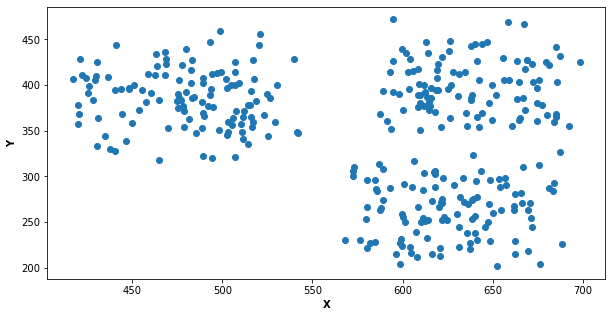

In [49]:
### Visualising dataset
plt.figure(figsize=(10,5))
plt.scatter(data= dataset, x='x', y='y')
plt.xlabel("X", fontsize=10, fontweight='bold')
plt.ylabel("Y", fontsize=10, fontweight='bold')

In [41]:
### Calculating WCSS for K=1 to K=11 clusters
wcss=[]


for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(dataset)
    wcss.append(round(km.inertia_,2))
    
print(f"WCSS list: {wcss}")

WCSS list: [1634662.14, 637691.33, 544675.04, 467501.54, 401945.06, 338585.28, 287823.43, 246019.25, 224975.35]


Text(0.5, 1.0, 'WCSS vs K Value')

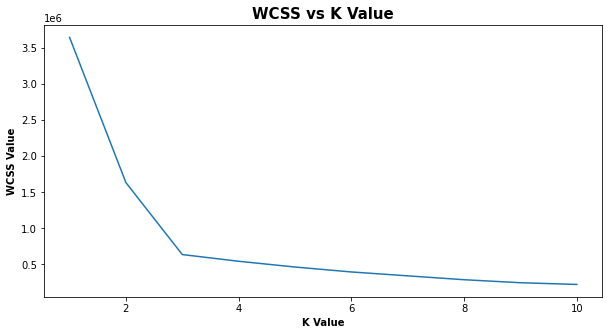

In [10]:
### Plotting WCSS with K
plt.figure(figsize=(10, 5))
plt.plot(range(1,11), wcss)
plt.xlabel("K Value", fontsize=10, fontweight='bold')
plt.ylabel("WCSS Value", fontsize=10, fontweight='bold')
plt.title("WCSS vs K Value", fontsize=15, fontweight='bold')

In [12]:
### Getting labels of clustered records
X= dataset.iloc[:,:].values
km = KMeans(n_clusters=3)
y_means=km.fit_predict(X)
y_means

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
### Silhoutte score
score= round(silhouette_score(X, km.labels_, metric='euclidean'),3)
score

0.735

Text(0, 0.5, 'Y')

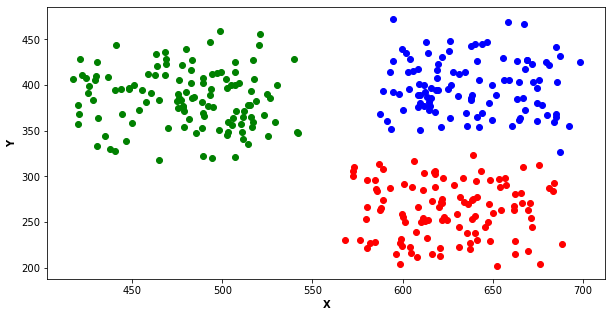

In [13]:
### Plotting different clusters after K-Means Clustering
plt.figure(figsize=(10,5))
plt.scatter(X[y_means==0,0], X[y_means==0,1], color='blue')
plt.scatter(X[y_means==1,0], X[y_means==1,1], color='red')
plt.scatter(X[y_means==2,0], X[y_means==2,1], color='green')
plt.xlabel("X", fontsize=10, fontweight='bold')
plt.ylabel("Y", fontsize=10, fontweight='bold')

## <span style='color:red '>3.0 Creating 3-D dataset for clustering </span>

In [43]:
### defining four centroid
centroids=[(-5,-5,5), (5,5,-5), (3.5,-2.5, 4), (-2.5, 2.5,-4)]

### standard deviation for cluster 
cluster_std=[1,1,1,1]

### Creating 300 samples
X,y=make_blobs(n_samples=300, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=1)

In [44]:
### Visualizing dataset
fig= px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show();

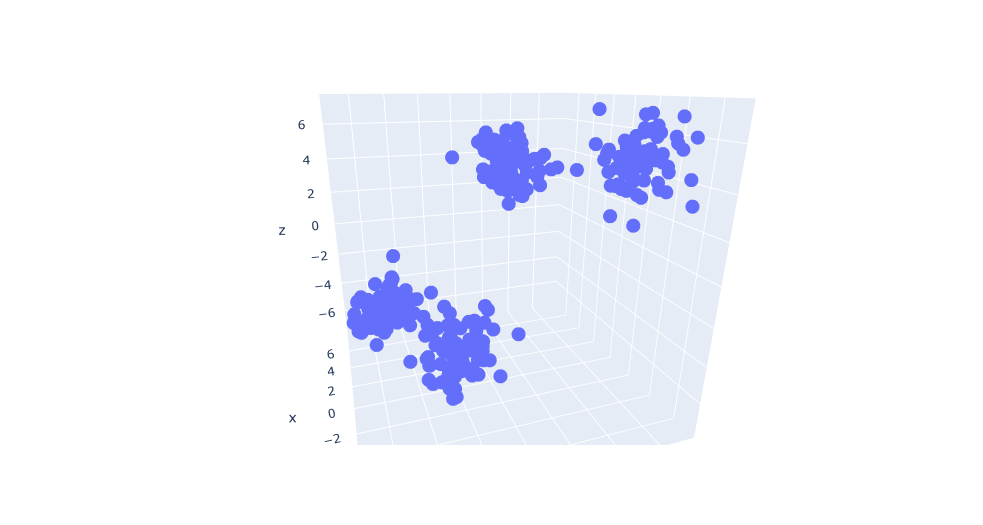

In [51]:
from IPython import display
display.Image("wo_cluster.png")

In [45]:
### Calculating WCSS for K=1 to K=21 clusters
wcss=[]

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(round(km.inertia_,2))
print(wcss)

[16520.33, 6135.27, 3215.25, 879.2, 810.02, 748.86, 693.28, 632.22, 587.3, 554.04, 525.92, 486.34, 461.4, 444.53, 424.88, 398.86, 384.19, 372.72, 357.65, 347.18]


Text(0.5, 1.0, 'WCSS vs K Value')

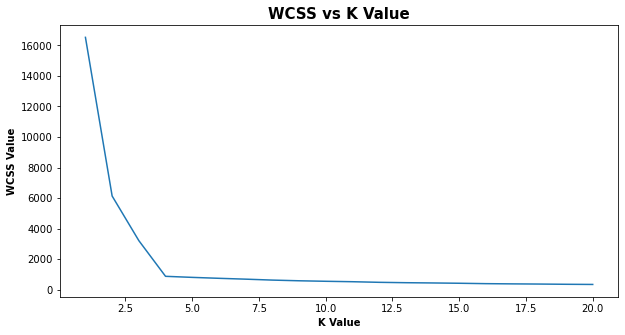

In [46]:
### Plotting WCSS with K
plt.figure(figsize=(10, 5))
plt.plot(range(1,21), wcss)
plt.xlabel("K Value", fontsize=10, fontweight='bold')
plt.ylabel("WCSS Value", fontsize=10, fontweight='bold')
plt.title("WCSS vs K Value", fontsize=15, fontweight='bold')

In [47]:
### Getting labels of clustered records
km = KMeans(n_clusters=4)
y_pred=km.fit_predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 2, 0, 2, 3, 3, 3, 2, 3, 1, 2, 2, 1, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 3, 3, 1, 1, 0, 2, 3, 0, 3, 1, 0, 2,
       2, 1, 2, 1, 3, 1, 0, 0, 1, 2, 0, 3, 0, 1, 0, 0, 3, 1, 1, 3, 0, 3,
       3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 2, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 3,
       3, 1, 0, 3, 2, 0, 0, 2, 1, 1, 1, 1, 0, 3, 2, 1, 3, 3, 2, 1, 0, 1,
       1, 1, 0, 0, 2, 1, 3, 2, 1, 1, 2, 2, 3, 0, 0, 3, 1, 1, 2, 2, 2, 3,
       2, 2, 0, 2, 3, 0, 3, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 3, 3, 2, 2, 2,
       0, 1, 2, 1, 3, 1, 2, 0, 2, 2, 3, 0, 0, 1, 2, 3, 0, 3, 2, 3, 1, 1,
       3, 2, 1, 0, 0, 1, 2, 2, 3, 3, 1, 3, 2, 1, 1, 0, 2, 3, 1, 1, 3, 2,
       2, 1, 0, 2, 3, 1, 2, 2, 3, 2, 0, 0, 2, 0, 3, 2, 0, 3, 0, 3, 2, 0,
       0, 1, 2, 3, 2, 0, 0, 0, 3, 2, 1, 3, 3, 3, 1, 3, 2, 1, 2, 3, 3, 2,
       0, 1, 0, 3, 1, 1, 3, 1, 0, 0, 3, 3, 1, 0, 3, 0, 2, 2, 1, 1, 1, 2,
       3, 0, 0, 3, 0, 1, 2, 3, 2, 2, 1, 2, 2, 0, 2, 3, 3, 0, 2, 2, 1, 1,
       0, 1, 3, 1, 3, 0, 0, 2, 0, 1, 3, 0, 1, 1])

In [48]:
### Silhoutte score
score= round(silhouette_score(X, km.labels_, metric='euclidean'),3)
score

0.735

In [23]:
### Creating dataset with labels and clustered data
df = pd.DataFrame()

df['col1']= X[:,0]
df['col2']= X[:,1]
df['col3']= X[:,2]
df['label']= y_pred

df.head()

,col1,col2,col3,label
0,-4.470535,-4.862299,5.077821,1
1,-4.576802,3.447501,-4.503974,0
2,-2.349984,2.963534,-3.602120,0
3,-1.481448,3.730558,-5.181103,0
4,-4.801700,-4.880991,4.329338,1


In [24]:
### Visualizing the clustered data
fig= px.scatter_3d(df, x='col1', y='col2', z='col3', color='label')
fig.show()

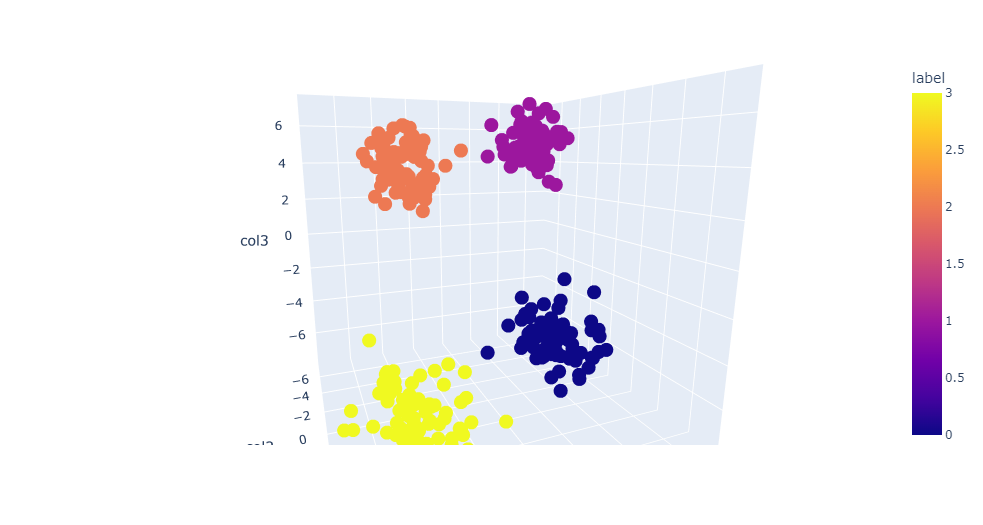

In [52]:
from IPython import display
display.Image("w_cluster.png")